In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data_poems.csv')
df = df.drop('Unnamed: 0', axis =1)

In [ ]:

df['type'].value_counts()

Nature    1292
Love      1267
Death      586
Name: type, dtype: int64

In [ ]:
import string
import re
import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['content'] = df['content'].apply(lambda x: str(x))
df

,content,type
0,didst thou promise beauteous day make travel ...,Nature
1,welcome sun sea freake returned cheereth beam...,Nature
2,met courtier riding plain wellmounted brave g...,Nature
3,walking field wantcatcher spied went desirous...,Nature
4,fishing fisher may protest pleasure sweetest ...,Nature
...,...,...
3140,believein death sureof thisit loved memoon su...,Love
3141,god let body befrom brave eye shall sprout tr...,Love
3142,thee praise river whose white voice pas upon ...,Love
3143,consider owoman thismy body lainwith empty ar...,Love


In [ ]:
df['content'] = df['content'].apply(lambda x: ' '.join(re.sub(r"^\r\n"," ",x.lower()).split()))
df

,content,type
0,didst thou promise beauteous day make travel f...,Nature
1,welcome sun sea freake returned cheereth beam ...,Nature
2,met courtier riding plain wellmounted brave ga...,Nature
3,walking field wantcatcher spied went desirous ...,Nature
4,fishing fisher may protest pleasure sweetest s...,Nature
...,...,...
3140,believein death sureof thisit loved memoon sun...,Love
3141,god let body befrom brave eye shall sprout tre...,Love
3142,thee praise river whose white voice pas upon f...,Love
3143,consider owoman thismy body lainwith empty arm...,Love


In [ ]:
df['content'] = df['content'].apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))
df

,content,type
0,didst thou promise beauteous day make travel f...,Nature
1,welcome sun sea freake returned cheereth beam ...,Nature
2,met courtier riding plain wellmounted brave ga...,Nature
3,walking field wantcatcher spied went desirous ...,Nature
4,fishing fisher may protest pleasure sweetest s...,Nature
...,...,...
3140,believein death sureof thisit loved memoon sun...,Love
3141,god let body befrom brave eye shall sprout tre...,Love
3142,thee praise river whose white voice pas upon f...,Love
3143,consider owoman thismy body lainwith empty arm...,Love


In [ ]:
stop_words = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df

,content,type
0,didst thou promise beauteous day make travel f...,Nature
1,welcome sun sea freake returned cheereth beam ...,Nature
2,met courtier riding plain wellmounted brave ga...,Nature
3,walking field wantcatcher spied went desirous ...,Nature
4,fishing fisher may protest pleasure sweetest s...,Nature
...,...,...
3140,believein death sureof thisit loved memoon sun...,Love
3141,god let body befrom brave eye shall sprout tre...,Love
3142,thee praise river whose white voice pas upon f...,Love
3143,consider owoman thismy body lainwith empty arm...,Love


In [ ]:
from nltk.tokenize import word_tokenize
df['content'] = df['content'].apply(lambda x: word_tokenize(x))
lemmatizer = nltk.stem.WordNetLemmatizer()

def lem(text):
    modified = ""
    for w in text:
        modified = modified + " " +lemmatizer.lemmatize(w)
    return modified

df['content'] = df['content'].apply(lambda x: lem(x))
df

,content,type
0,didst thou promise beauteous day make travel ...,Nature
1,welcome sun sea freake returned cheereth beam...,Nature
2,met courtier riding plain wellmounted brave g...,Nature
3,walking field wantcatcher spied went desirous...,Nature
4,fishing fisher may protest pleasure sweetest ...,Nature
...,...,...
3140,believein death sureof thisit loved memoon su...,Love
3141,god let body befrom brave eye shall sprout tr...,Love
3142,thee praise river whose white voice pa upon f...,Love
3143,consider owoman thismy body lainwith empty ar...,Love


In [ ]:

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional


In [ ]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 150

In [ ]:
labels = df['type']
labels

0       Nature
1       Nature
2       Nature
3       Nature
4       Nature
         ...  
3140      Love
3141      Love
3142      Love
3143      Love
3144      Love
Name: type, Length: 3145, dtype: object

In [ ]:
all_data = df['content']

In [ ]:
labels=np.array(labels)
labels

array(['Nature', 'Nature', 'Nature', ..., 'Love', 'Love', 'Love'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(labels)
Y

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(all_data)
sequences = tokenizer.texts_to_sequences(all_data)
word_index = tokenizer.word_index
features = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print(len(word_index))

30662


In [ ]:
Y = to_categorical(Y)

In [ ]:
Y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2830, 100) (2830, 3)
(315, 100) (315, 3)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=features.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

epochs = 10
batch_size = 64

checkpoint = ModelCheckpoint('weights.{epoch:03d}-{accuracy:.4f}.hdf5', monitor='accuracy', verbose=1, save_best_only=True, mode='auto')
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpoint], validation_data=(X_test, Y_test))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 150)          7500000   
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 100, 150)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               100400    
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 303       
Total params: 7,600,703
Trainable params: 7,600,703
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
45/45 [==============================] - 22s 419ms/step - loss: 1.0645 - accuracy: 0.4052 - val_loss: 0.9233 - val_accuracy: 0.6032

Epoch 00001: accuracy improved from -inf to 0.44382, saving model to weights.001-0.4438.hdf5

In [ ]:
score = model.evaluate( X_test, Y_test)
score

10/10 [==============================] - 0s 35ms/step - loss: 1.0654 - accuracy: 0.6381


[1.0653668642044067, 0.6380952596664429]

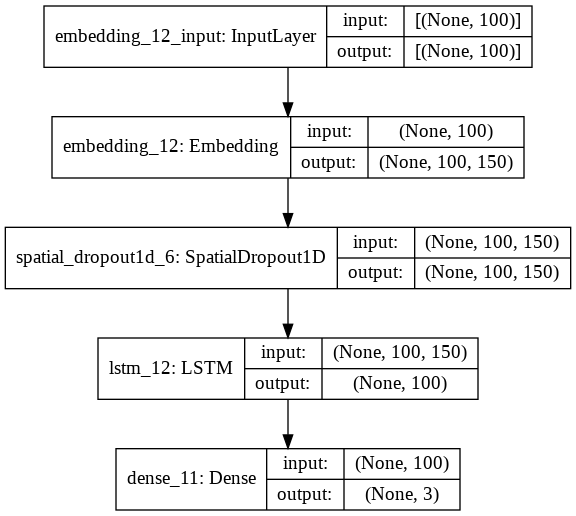

In [ ]:
import keras
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
model.save("model_lstm.h5")

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
!cp model_lstm.h5 "drive/My Drive/"

In [ ]:
!cp tokenizer.pickle "drive/My Drive/"

In [ ]:
import re
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line

In [ ]:
def predict(text):
    txt = remove_punctuation(text)
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    print(pred[0])
    cat_id= pred.argmax(axis=1)[0]
    print(cat_id)
    if cat_id == 0:
        cat = 'Death'
    elif cat_id ==1:
        cat = 'Love'
    elif cat_id ==2:
        cat = 'Nature'
    return cat